In [1]:
pip install pandas numpy matplotlib seaborn yfinance scipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf

In [2]:
data = pd.read_csv('sp500_esg.csv')
data.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,"18,000","Agilent Technologies, Inc. provides applicatio...",15.0,0.3,6.3,8.6,Low,1.0,11th percentile,Low
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,"132,500","American Airlines Group Inc., through its subs...",29.0,12.0,5.0,12.0,Moderate,2.0,62nd percentile,NaN
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,"40,000","Advance Auto Parts, Inc. provides automotive r...",12.0,0.0,3.0,8.0,Moderate,2.0,4th percentile,Negligible
3,AAPL,Apple Inc,"One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,Consumer Electronics,"164,000","Apple Inc. designs, manufactures, and markets ...",17.0,0.6,9.2,6.9,Significant,3.0,15th percentile,Low
4,ABBV,Abbvie Inc,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers—General,"50,000","AbbVie Inc. discovers, develops, manufactures,...",28.0,1.1,9.9,16.8,Significant,3.0,55th percentile,Medium


In [3]:
columns_of_interest = ['Full Time Employees', 'Total ESG Risk score', 'ESG Risk Level']

# Drop rows with NaN values in any of these columns
data = data.dropna(subset=columns_of_interest)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 0 to 502
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  370 non-null    object 
 1   Name                    370 non-null    object 
 2   Address                 370 non-null    object 
 3   Sector                  370 non-null    object 
 4   Industry                370 non-null    object 
 5   Full Time Employees     370 non-null    object 
 6   Description             370 non-null    object 
 7   Total ESG Risk score    370 non-null    float64
 8   Environment Risk Score  370 non-null    float64
 9   Governance Risk Score   370 non-null    float64
 10  Social Risk Score       370 non-null    float64
 11  Controversy Level       347 non-null    object 
 12  Controversy Score       370 non-null    float64
 13  ESG Risk Percentile     370 non-null    object 
 14  ESG Risk Level          370 non-null    object 

In [5]:
data['Full Time Employees'] = data['Full Time Employees'].astype(str).str.replace(',', '').astype(float).astype('Int64')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 0 to 502
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  370 non-null    object 
 1   Name                    370 non-null    object 
 2   Address                 370 non-null    object 
 3   Sector                  370 non-null    object 
 4   Industry                370 non-null    object 
 5   Full Time Employees     370 non-null    Int64  
 6   Description             370 non-null    object 
 7   Total ESG Risk score    370 non-null    float64
 8   Environment Risk Score  370 non-null    float64
 9   Governance Risk Score   370 non-null    float64
 10  Social Risk Score       370 non-null    float64
 11  Controversy Level       347 non-null    object 
 12  Controversy Score       370 non-null    float64
 13  ESG Risk Percentile     370 non-null    object 
 14  ESG Risk Level          370 non-null    object 

In [7]:
data.describe()

,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
count,370.0,370.000000,370.000000,370.000000,370.000000,370.000000
mean,66745.986486,21.121622,5.469189,6.653514,8.991351,1.924324
std,157724.631833,7.364959,5.260140,2.122432,3.805663,0.933973
min,165.0,9.000000,0.000000,3.000000,1.100000,0.000000
25%,11362.0,15.000000,1.500000,5.200000,6.450000,1.000000
50%,24025.0,20.000000,3.550000,6.100000,8.600000,2.000000
75%,67075.0,26.000000,8.350000,7.675000,11.500000,2.000000
max,2100000.0,46.000000,24.100000,15.500000,21.000000,5.000000


In [8]:
data['ESG Risk Level'].unique()

array(['Low', 'Negligible', 'Medium', 'Severe', 'High'], dtype=object)

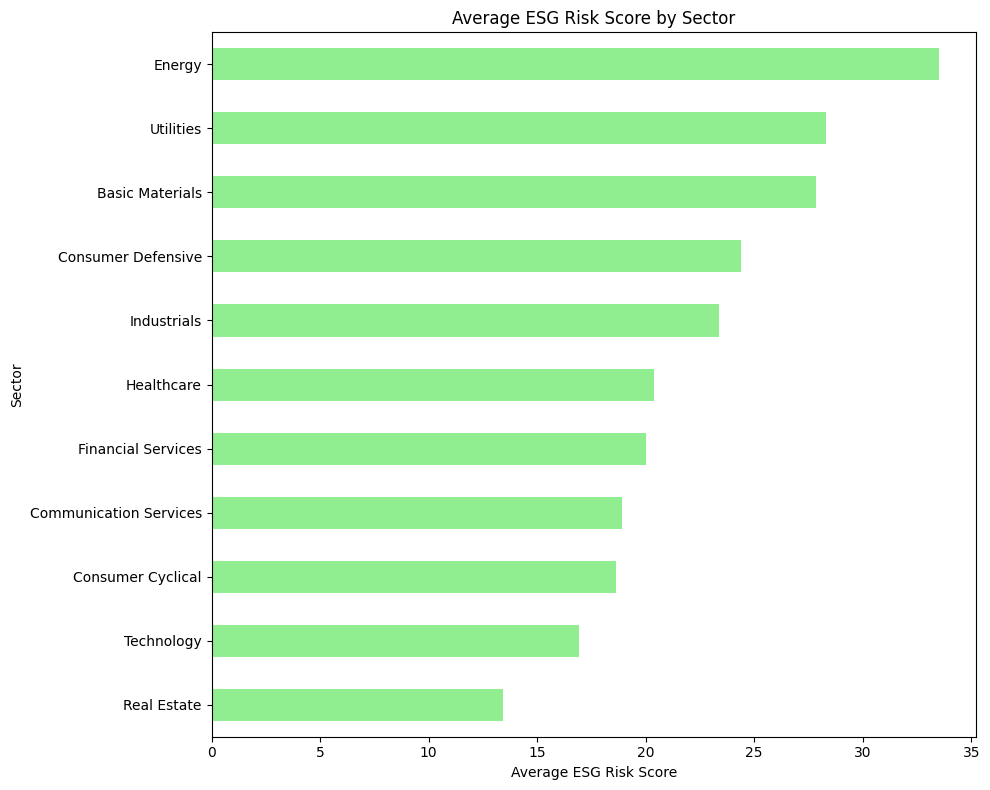

In [9]:
sector_esg = data.groupby('Sector')['Total ESG Risk score'].mean().sort_values()

# Plotting ESG scores by sector
plt.figure(figsize=(10, 8))
sector_esg.plot(kind='barh', color='lightgreen')
plt.title('Average ESG Risk Score by Sector')
plt.xlabel('Average ESG Risk Score')
plt.ylabel('Sector')
plt.tight_layout()

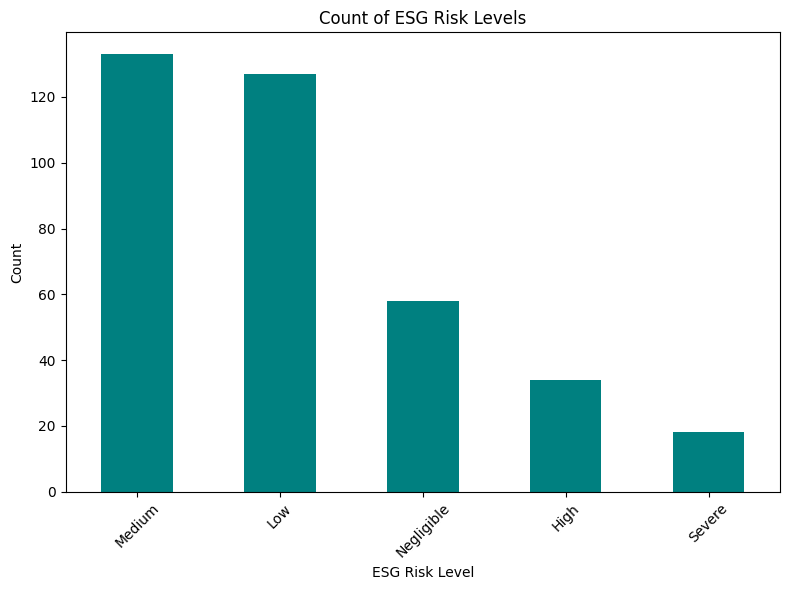

In [10]:
# Count the occurrences of each ESG Risk Level
esg_risk_levels = data['ESG Risk Level'].value_counts()

# Plotting the counts of ESG Risk Levels
plt.figure(figsize=(8, 6))
esg_risk_levels.plot(kind='bar', color='teal')
plt.title('Count of ESG Risk Levels')
plt.xlabel('ESG Risk Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotates labels to improve readability
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
# Create ESG & Traditional groups

# Define the conditions for the groups
conditions = [
    data['ESG Risk Level'].isin(['Low', 'Negligible']),  # ESG group
    data['ESG Risk Level'].isin(['Medium', 'High', 'Severe'])  # Traditional group
]

# Define the labels for the groups
labels = ['ESG', 'Traditional']

# Create a new column in the DataFrame to store the group labels
data['Group'] = np.select(conditions, labels, default='Unknown')

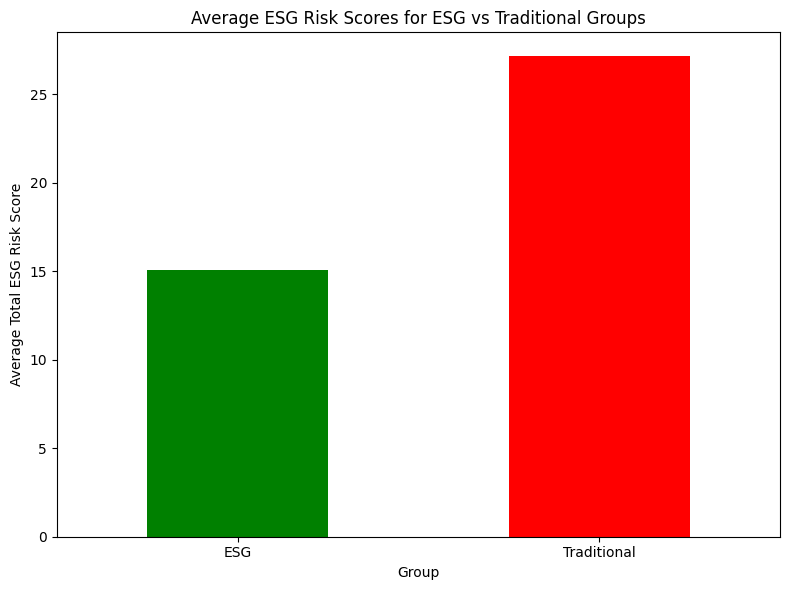

In [12]:
average_esg_scores = data.groupby('Group')['Total ESG Risk score'].mean()

# Create a bar plot for the average ESG scores by group
plt.figure(figsize=(8, 6))
average_esg_scores.plot(kind='bar', color=['green', 'red'])  # Color-coded for visual distinction
plt.title('Average ESG Risk Scores for ESG vs Traditional Groups')
plt.xlabel('Group')
plt.ylabel('Average Total ESG Risk Score')
plt.xticks(rotation=0)  # Keep the group names horizontal for readability
plt.tight_layout()

# Display the plot
plt.show()

In [13]:
group_counts = data['Group'].value_counts()

group_counts

Group
ESG            185
Traditional    185
Name: count, dtype: int64

In [14]:
# Sort the data within each group by 'Full Time Employees' in descending order
sorted_data = data.sort_values(by=['Group', 'Full Time Employees'], ascending=[True, False])

# Use groupby and head to select the top 20 companies from each group
top_20_esg = sorted_data[sorted_data['Group'] == 'ESG'].head(20)
top_20_traditional = sorted_data[sorted_data['Group'] == 'Traditional'].head(20)

# Combine the top 20 from each group into a new DataFrame
esg_data = pd.concat([top_20_esg, top_20_traditional])

esg_data.head(3)

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level,Group
8,ACN,Accenture Plc Cl A,1 Grand Canal Square\nGrand Canal Harbour\nDub...,Technology,Information Technology Services,732000,"Accenture plc, a professional services company...",10.0,0.3,4.8,4.6,Moderate,2.0,2nd percentile,Negligible,ESG
220,HD,Home Depot Inc,"2455 Paces Ferry Road\nAtlanta, GA 30339\nUnit...",Consumer Cyclical,Home Improvement Retail,470000,"The Home Depot, Inc. operates as a home improv...",13.0,3.4,3.6,5.5,Moderate,2.0,5th percentile,Low,ESG
440,TGT,Target Corp,"1000 Nicollet Mall\nMinneapolis, MN 55403\nUni...",Consumer Defensive,Discount Stores,440000,Target Corporation operates as a general merch...,15.0,2.0,5.1,7.6,Significant,3.0,10th percentile,Low,ESG


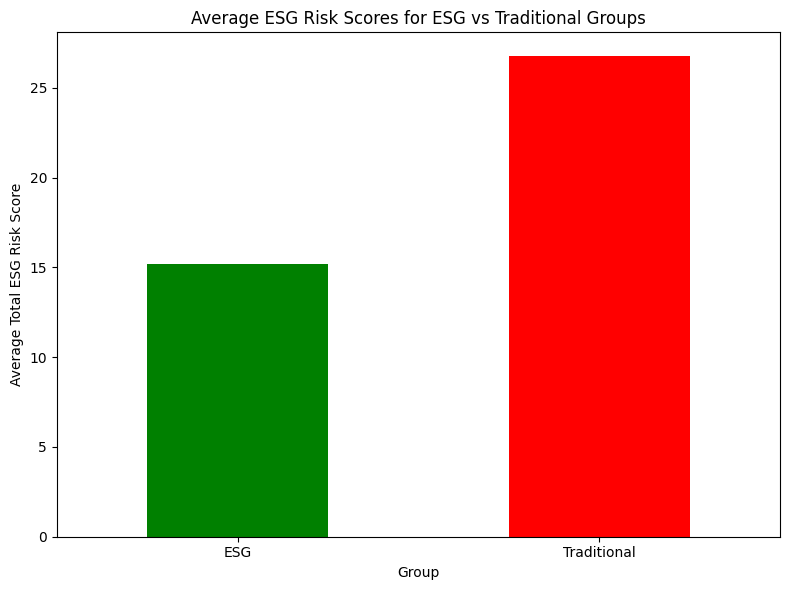

In [15]:
average_esg_scores = esg_data.groupby('Group')['Total ESG Risk score'].mean()

# Create a bar plot for the average ESG scores by group
plt.figure(figsize=(8, 6))
average_esg_scores.plot(kind='bar', color=['green', 'red'])  # Color-coded for visual distinction
plt.title('Average ESG Risk Scores for ESG vs Traditional Groups')
plt.xlabel('Group')
plt.ylabel('Average Total ESG Risk Score')
plt.xticks(rotation=0)  # Keep the group names horizontal for readability
plt.tight_layout()

# Display the plot
plt.show()

In [16]:
# Extract the stock symbols
symbols = esg_data['Symbol'].tolist()

# Define the start and end dates
start_date = '2021-01-01'
end_date = '2022-12-31'

# Use yfinance to download the monthly data
stock_data = yf.download(symbols, start=start_date, end=end_date, interval='1mo')

# Clean the data by removing any entries with NaN values in the 'Adj Close' column which are used to calculate returns
stock_data = stock_data['Adj Close'].dropna(how='all')

[*********************100%%**********************]  40 of 40 completed


In [17]:
# Calculate the percentage change month-over-month
monthly_returns = stock_data.pct_change().dropna(how='all')

In [18]:
print(monthly_returns.head())

Ticker          AAPL       ACN      AMZN      APTV       BAC         C  \
Date                                                                     
2021-02-01 -0.081085  0.040664 -0.035328  0.121557  0.170658  0.145742   
2021-03-01  0.008845  0.101036  0.000372 -0.079685  0.114665  0.104280   
2021-04-01  0.076218  0.049665  0.120663  0.043437  0.052760 -0.020756   
2021-05-01 -0.052107 -0.023922 -0.070470  0.045382  0.045892  0.112541   
2021-06-01  0.100976  0.044762  0.067355  0.045938 -0.027365 -0.101130   

Ticker         CMCSA      COST      CTSH       CVS  ...       PEP      SBUX  \
Date                                                ...                       
2021-02-01  0.068412 -0.060806 -0.057344 -0.042767  ... -0.054038  0.115897   
2021-03-01  0.026366  0.066997  0.066510  0.104213  ...  0.094899  0.015785   
2021-04-01  0.037701  0.055634  0.029186  0.015552  ...  0.027297  0.047771   
2021-05-01  0.025873  0.018786 -0.109950  0.138838  ...  0.026221 -0.005328   
2021-06

In [19]:
average_monthly_returns = monthly_returns.mean()

In [21]:
# Map symbols to group colors
group_colors = esg_data.set_index('Symbol')['Group'].map({'ESG': 'green', 'Traditional': 'blue'}).reindex(monthly_returns.columns)

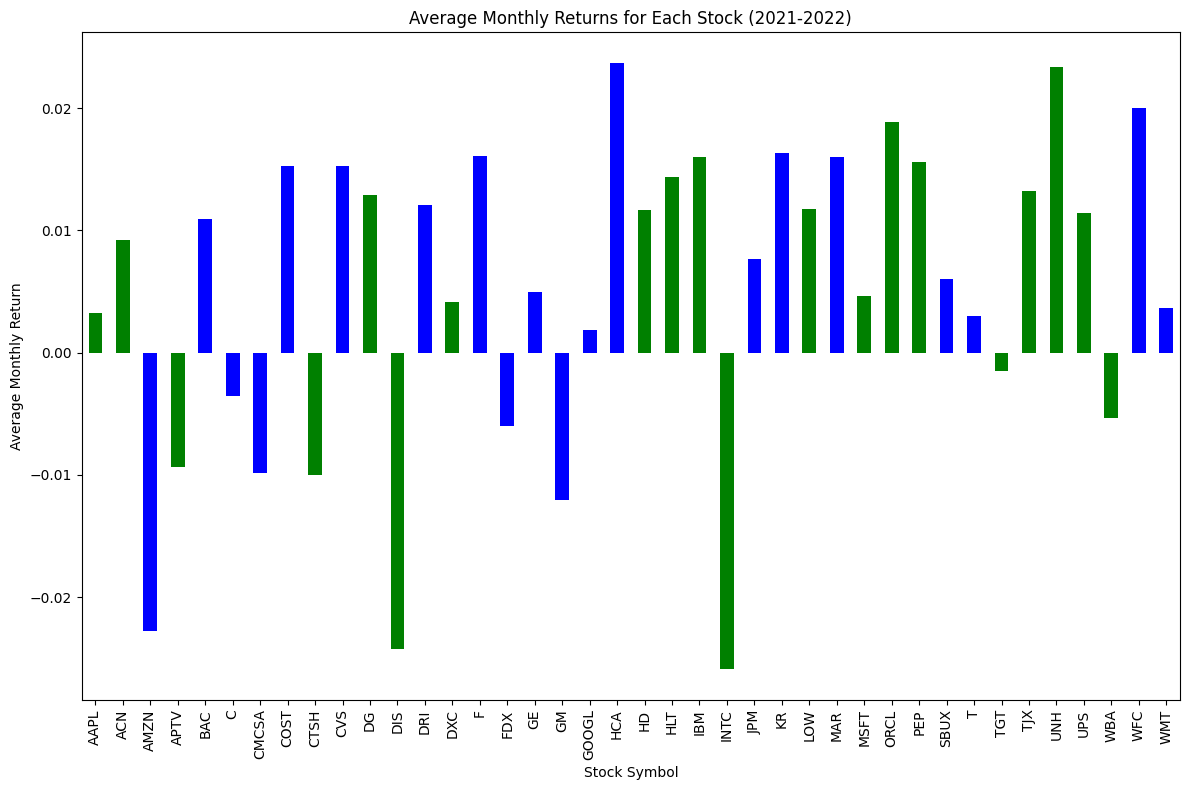

In [22]:
# Create a bar chart with colors based on the group
plt.figure(figsize=(12, 8))
average_monthly_returns.plot(kind='bar', color=group_colors)
plt.title('Average Monthly Returns for Each Stock (2021-2022)')
plt.xlabel('Stock Symbol')
plt.ylabel('Average Monthly Return')
plt.xticks(rotation=90)  # Rotate stock symbols for better readability
plt.tight_layout()

# Display the plot
plt.show()

In [23]:
# Create a DataFrame from the average returns
average_returns_df = average_monthly_returns.reset_index()
average_returns_df.columns = ['Symbol', 'AvgReturn']

# Merge with the esg_data to get the group information
average_returns_with_group = average_returns_df.merge(esg_data[['Symbol', 'Group']], on='Symbol')

In [24]:
# Calculate the average return for each group
group_average_returns = average_returns_with_group.groupby('Group')['AvgReturn'].mean()

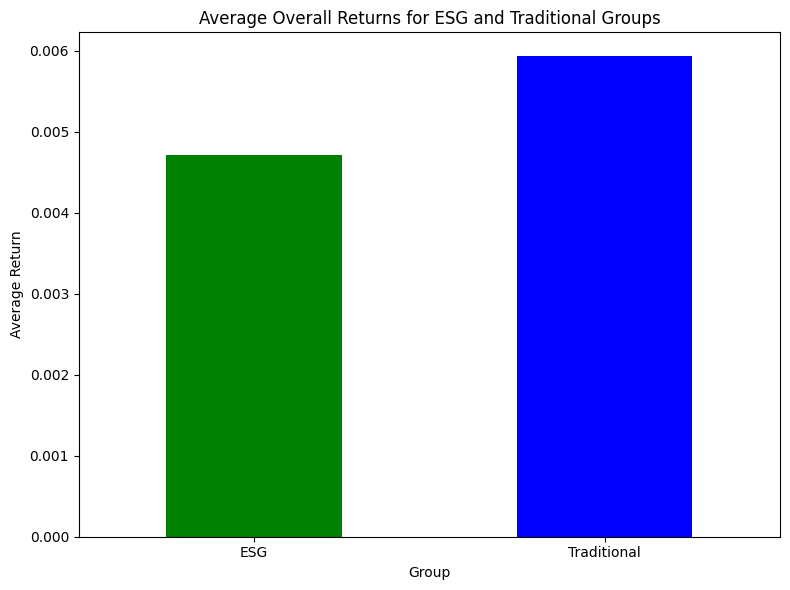

In [25]:
# Create a bar graph of the group average returns
plt.figure(figsize=(8, 6))
group_average_returns.plot(kind='bar', color=['green', 'blue'])  # 'green' for ESG and 'blue' for Traditional
plt.title('Average Overall Returns for ESG and Traditional Groups')
plt.xlabel('Group')
plt.ylabel('Average Return')
plt.xticks(rotation=0)  # Keep the labels horizontal
plt.tight_layout()

# Display the plot
plt.show()

In [26]:
# Create a DataFrame from the average returns
average_returns_df = average_monthly_returns.reset_index()
average_returns_df.columns = ['Symbol', 'AvgReturn']

# Merge with the esg_data to get the number of full-time employees
stock_data_with_employees = average_returns_df.merge(esg_data[['Symbol', 'Full Time Employees']], on='Symbol')

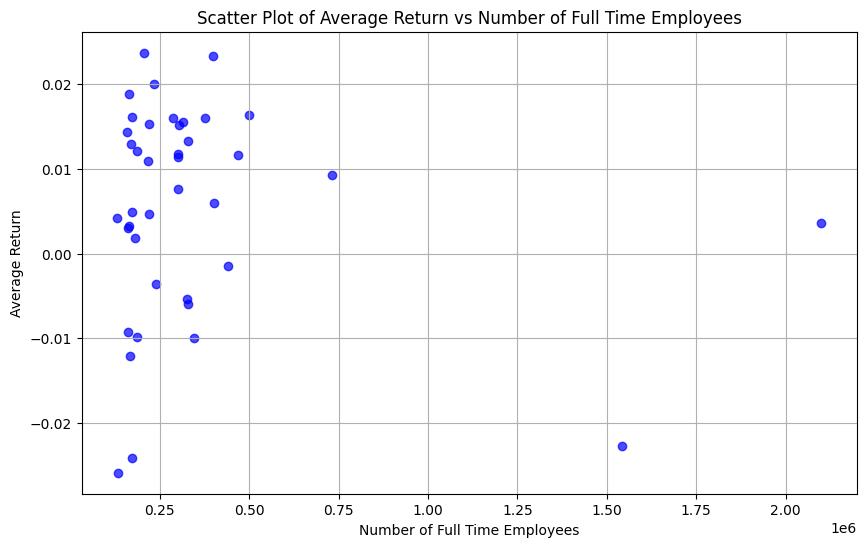

In [27]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(stock_data_with_employees['Full Time Employees'], stock_data_with_employees['AvgReturn'], alpha=0.7, c='blue')
plt.title('Scatter Plot of Average Return vs Number of Full Time Employees')
plt.xlabel('Number of Full Time Employees')
plt.ylabel('Average Return')
plt.grid(True)

# Display the plot
plt.show()


In [29]:
# Map average returns to the corresponding symbols in esg_data
esg_data['AvgReturn'] = esg_data['Symbol'].map(average_monthly_returns)

In [30]:
# Check for missing 'AvgReturn' data
print(esg_data['AvgReturn'].isnull().sum())

0


In [31]:
# Correlation Analysis

# Assuming you have average returns merged with the esg_data and stored as 'AvgReturn'
correlation_matrix = esg_data[['Total ESG Risk score', 'AvgReturn']].corr()
print(correlation_matrix)

                      Total ESG Risk score  AvgReturn
Total ESG Risk score              1.000000   0.026151
AvgReturn                         0.026151   1.000000


In [32]:
# Comparative Analysis
# T-Test

from scipy.stats import ttest_ind

# Filter groups
group_esg = esg_data[esg_data['Group'] == 'ESG']['AvgReturn']
group_traditional = esg_data[esg_data['Group'] == 'Traditional']['AvgReturn']

# T-test
t_stat, p_value = ttest_ind(group_esg.dropna(), group_traditional.dropna())
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -0.3003630063794739
P-value: 0.7655374269175879


In [33]:
# Regression Analysis

import statsmodels.api as sm

# Ensure Full Time Employees and ESG Risk scores are suitable for regression (handling NaNs if needed)
esg_data['Full Time Employees'] = esg_data['Full Time Employees'].replace(',', '', regex=True).astype(float)

# Prepare regression model
X = sm.add_constant(esg_data[['Total ESG Risk score', 'Full Time Employees']])  # adding a constant
y = esg_data['AvgReturn']

model = sm.OLS(y, X, missing='drop').fit()  # dropping missing values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              AvgReturn   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.3953
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.676
Time:                        17:03:57   Log-Likelihood:                 118.90
No. Observations:                  40   AIC:                            -231.8
Df Residuals:                      37   BIC:                            -226.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0056 

In [35]:
# Create a binary dummy variable where 1 represents 'Traditional' and 0 represents 'ESG'
esg_data['Group_Traditional'] = (esg_data['Group'] == 'Traditional').astype(int)

In [36]:
# Prepare data for regression
X = sm.add_constant(esg_data[['Group_Traditional', 'Full Time Employees']])  # Include the dummy variable
y = esg_data['AvgReturn']

# Fit the regression model
model = sm.OLS(y, X, missing='drop').fit()  # Handle missing values by dropping

In [37]:
# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              AvgReturn   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.4721
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.627
Time:                        17:04:03   Log-Likelihood:                 118.98
No. Observations:                  40   AIC:                            -232.0
Df Residuals:                      37   BIC:                            -226.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0062    

In [45]:
print(average_returns_df.head)

<bound method NDFrame.head of    Symbol  AvgReturn
0    AAPL   0.003270
1     ACN   0.009221
2    AMZN  -0.022800
3    APTV  -0.009333
4     BAC   0.010952
5       C  -0.003568
6   CMCSA  -0.009845
7    COST   0.015239
8    CTSH  -0.009984
9     CVS   0.015305
10     DG   0.012935
11    DIS  -0.024196
12    DRI   0.012125
13    DXC   0.004156
14      F   0.016119
15    FDX  -0.005995
16     GE   0.004963
17     GM  -0.012070
18  GOOGL   0.001848
19    HCA   0.023728
20     HD   0.011636
21    HLT   0.014401
22    IBM   0.015992
23   INTC  -0.025904
24    JPM   0.007645
25     KR   0.016312
26    LOW   0.011778
27    MAR   0.016029
28   MSFT   0.004646
29   ORCL   0.018881
30    PEP   0.015565
31   SBUX   0.006028
32      T   0.002978
33    TGT  -0.001464
34    TJX   0.013255
35    UNH   0.023333
36    UPS   0.011423
37    WBA  -0.005345
38    WFC   0.019999
39    WMT   0.003634>


In [47]:
average_returns_df.to_csv('average_monthly_returns.csv', index=False)
data.to_csv('grouped_data.csv', index=False)
esg_data.to_csv('top_20_companies_by_group.csv', index=False)
stock_data.to_csv('cleaned_stock_data.csv')
monthly_returns.to_csv('monthly_returns_data.csv')
group_average_returns.to_csv('group_average_returns.csv')